In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
sal=pd.read_csv("Salary_Data.csv")
sal
sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


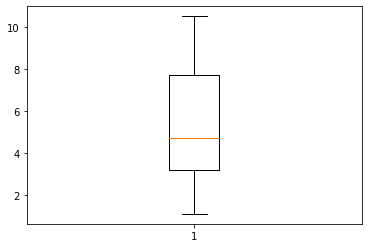

In [3]:
plt.boxplot(sal.YearsExperience)
sal.describe()

In [5]:
sal.shape

(30, 2)

In [6]:
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

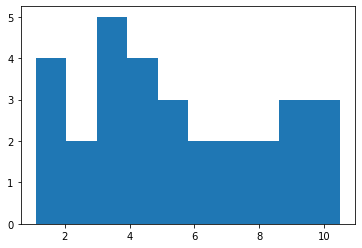

In [7]:
plt.hist(sal.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x15269f65220>,
 'caps': [<matplotlib.lines.Line2D at 0x15269f65910>,
 'boxes': [<matplotlib.lines.Line2D at 0x15269db7850>],
 'medians': [<matplotlib.lines.Line2D at 0x1526a0d1c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x15269dd0730>],
 'means': []}

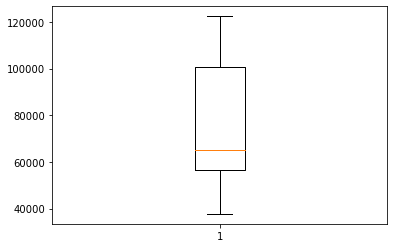

In [8]:
plt.boxplot(sal.Salary)

Text(0, 0.5, 'Salary')

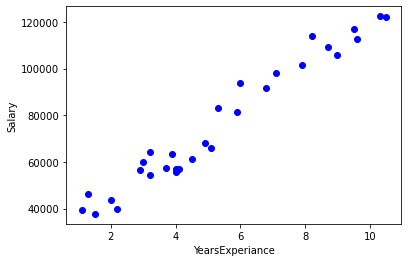

In [9]:
plt.plot(sal.YearsExperience,sal.Salary,"bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [10]:
sal.Salary.corr(sal.YearsExperience)

0.9782416184887598

In [12]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=sal).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model.summary()
model.resid 
model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [14]:
print(model.conf_int(0.05))

                            0             1
Intercept        21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896


In [16]:
pred = model.predict(sal.iloc[:,0])
pred
pd.set_option("display.max_rows", 30) 
pred
rmse_lin = np.sqrt(np.mean((np.array(sal['Salary'])-np.array(pred))**2))
rmse_lin 

5592.043608760662

Text(0, 0.5, 'Salary')

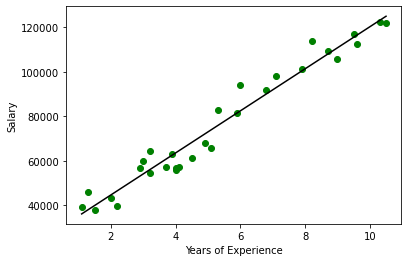

In [17]:
import matplotlib.pylab as plt
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='green')
plt.plot(sal['YearsExperience'],pred,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [18]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=sal).fit()
model2.params
model2.resid 
model2.resid_pearson 


array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           3.25e-13
Time:                        21:34:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred2 = model2.predict(pd.DataFrame(sal['YearsExperience']))

In [21]:
pred2
rmse_log = np.sqrt(np.mean((np.array(sal['Salary'])-np.array(pred2))**2))
rmse_log 

10302.893706228302

In [22]:
pred2.corr(sal.Salary)

0.924061081788264

Text(0, 0.5, 'Salary')

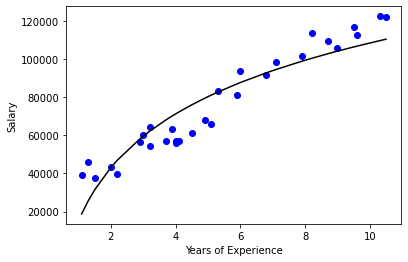

In [36]:
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='blue')
plt.plot(sal['YearsExperience'],pred2,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [29]:
model3 = smf.ols('Salary~np.log(YearsExperience)',data=sal).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           3.25e-13
Time:                        21:44:26   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred_log = model3.predict(pd.DataFrame(sal['YearsExperience']))

In [31]:
pred_log

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [32]:
pred3=np.exp(pred_log)  
pred3

C:\Users\bhavy\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     inf
8     inf
9     inf
10    inf
11    inf
12    inf
13    inf
14    inf
15    inf
16    inf
17    inf
18    inf
19    inf
20    inf
21    inf
22    inf
23    inf
24    inf
25    inf
26    inf
27    inf
28    inf
29    inf
dtype: float64

In [33]:
rmse_exp = np.sqrt(np.mean((np.array(sal['YearsExperience'])-np.array(pred3))**2))
rmse_exp 

inf

In [34]:
pred3.corr(sal.YearsExperience)

nan

Text(0, 0.5, 'Salary')

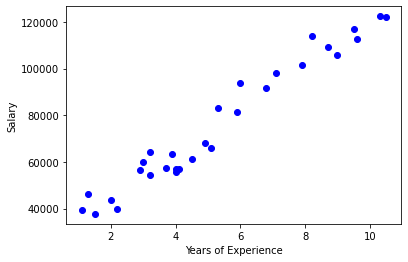

In [37]:
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='blue')
plt.plot(sal['YearsExperience'],pred3,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [38]:
student_resid = model3.resid_pearson 
student_resid

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

Text(0, 0.5, 'Standardized Residual')

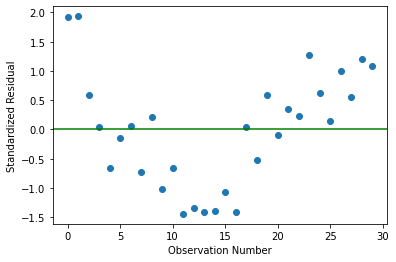

In [39]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [41]:
sal["YearsExperience_Sq"] = sal.YearsExperience*sal.YearsExperience
sal

,YearsExperience,Salary,YearsExperience_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [42]:
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=sal).fit()
model_quad.params

Intercept             10.336852
YearsExperience        0.202382
YearsExperience_Sq    -0.006614
dtype: float64

In [43]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           3.95e-18
Time:                        21:58:14   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred_quad = model_quad.predict(sal)
pred4=np.exp(pred_quad)  #
pred4
rmse_quad = np.sqrt(np.mean((np.array(sal['YearsExperience'])-np.array(pred4))**2))
rmse_quad 

80259.68479929335

Text(0, 0.5, 'Salary')

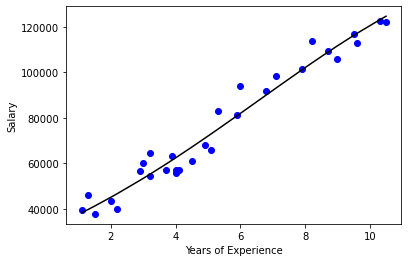

In [45]:
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='blue')
plt.plot(sal['YearsExperience'],pred4,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Standardized Residual')

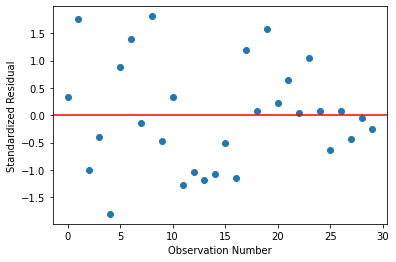

In [46]:
plt.scatter(np.arange(30),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

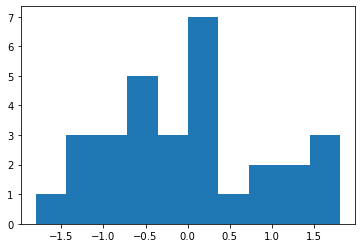

In [47]:
plt.hist(model_quad.resid_pearson)

In [56]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5.592044e+03,0.956957
1,rmse_log,1.030289e+04,0.853889
2,rmse_exp,inf,0.853889
3,rmse_quad,8.025968e+04,0.948611


In [49]:
import matplotlib.pyplot as plt
>>> plt.style.use('dark_background')

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

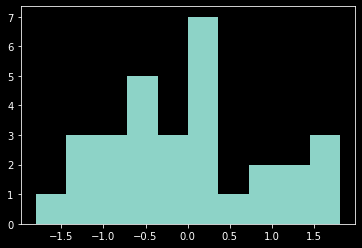

In [50]:
plt.hist(model_quad.resid_pearson)

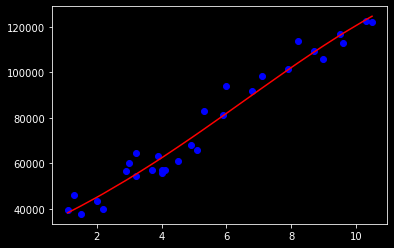

In [51]:
plt.scatter(sal.YearsExperience,sal.Salary,c="b")
plt.plot(sal.YearsExperience,pred4,"r")

In [ ]:
# model1 is the best model as it got the highest value of R- square